## Imports

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input
import vis_helper as v

2022-03-22 08:59:00.907685: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/lib/intel64
2022-03-22 08:59:00.907711: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore ab

## Prepare dataset

In [2]:
X = np.arange(1, 45, 3)

y = []
for i in X:
    y.append([i+1, i+2])

X = X.reshape(15, 1, 1)
y = np.array(y)

print("X: ", X)
print("y: ", y)

X:  [[[ 1]]

 [[ 4]]

 [[ 7]]

 [[10]]

 [[13]]

 [[16]]

 [[19]]

 [[22]]

 [[25]]

 [[28]]

 [[31]]

 [[34]]

 [[37]]

 [[40]]

 [[43]]]
y:  [[ 2  3]
 [ 5  6]
 [ 8  9]
 [11 12]
 [14 15]
 [17 18]
 [20 21]
 [23 24]
 [26 27]
 [29 30]
 [32 33]
 [35 36]
 [38 39]
 [41 42]
 [44 45]]


## Hyperparameters

In [3]:
EPOCHS = 2000
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

## Solution via Simple LSTM

In [4]:
model = Sequential()
inputs = Input(shape=(1, 1))
model.add(inputs)
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))

2022-03-22 08:59:02.200477: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-22 08:59:02.200634: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/openvino_2021/data_processing/dl_streamer/lib:/opt/intel/openvino_2021/data_processing/gstreamer/lib:/opt/intel/openvino_2021/opencv/lib:/opt/intel/openvino_2021/deployment_tools/ngraph/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/tbb/lib::/opt/intel/openvino_2021/deployment_tools/inference_engine/external/hddl/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/omp/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/gna/lib:/opt/intel/openvino_2021/deployment_tools/inference_engine/external/mkltiny_lnx/lib:/opt/intel/openvino_2021/deployment

In [5]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 10,502
Trainable params: 10,502
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

2022-03-22 08:59:02.300629: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-22 08:59:02.319425: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2803200000 Hz


## Training Plot

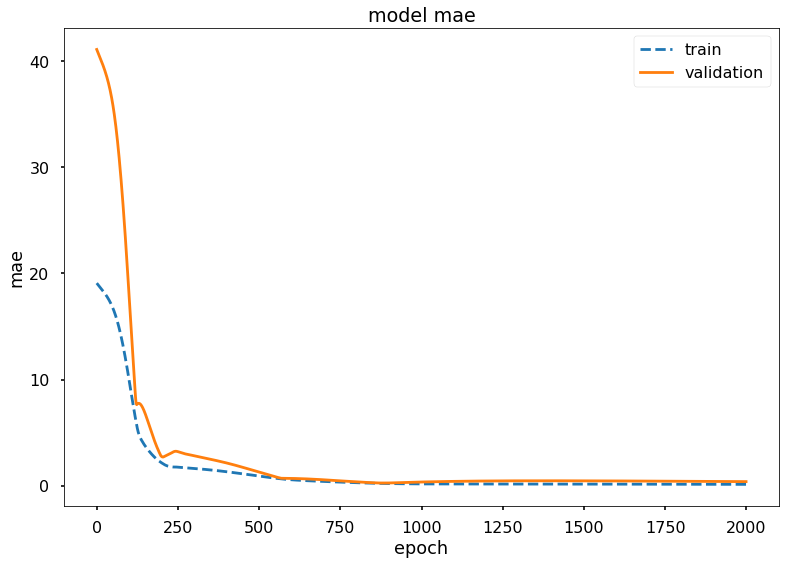

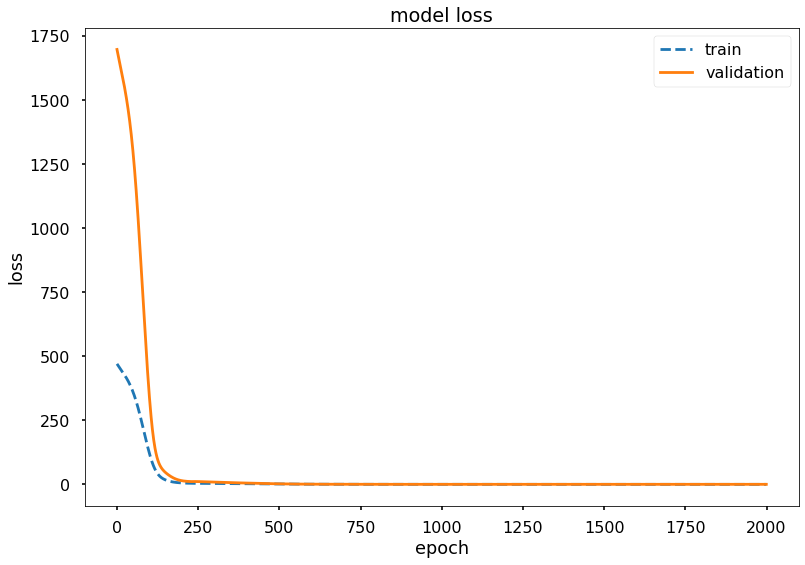

In [8]:
v.plot(history)

## Predictions

In [9]:
test_input = np.array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print("Input: ", test_input)
print("Actual: ", [11, 12])
print("Predicted: ", test_output)

Input:  [[[10]]]
Actual:  [11, 12]
Predicted:  [[11.090314 12.21483 ]]


___

## Solution via Stacked LSTM

In [10]:
model = Sequential()
inputs = Input(shape=(1, 1))
model.add(inputs)
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2))

In [11]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            161600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 100)            120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 315,812
Trainable params: 315,812
Non-trainable params: 0
________________________________________________

In [13]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

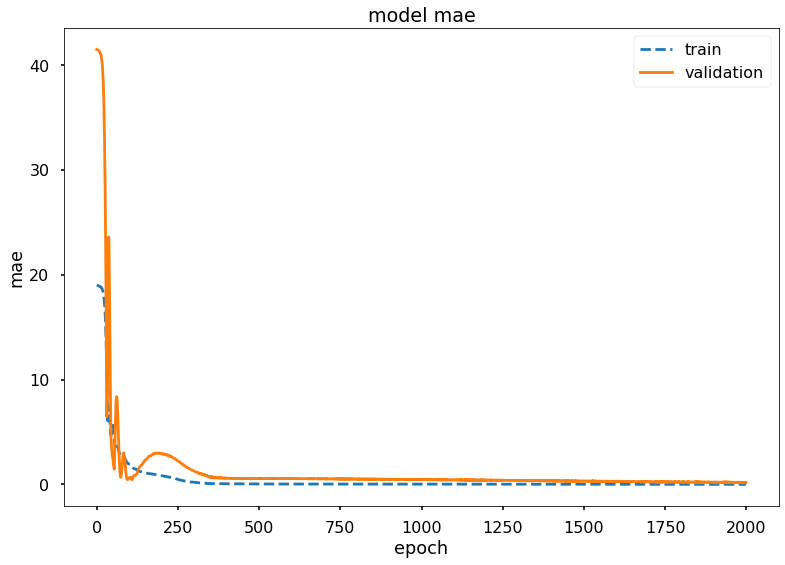

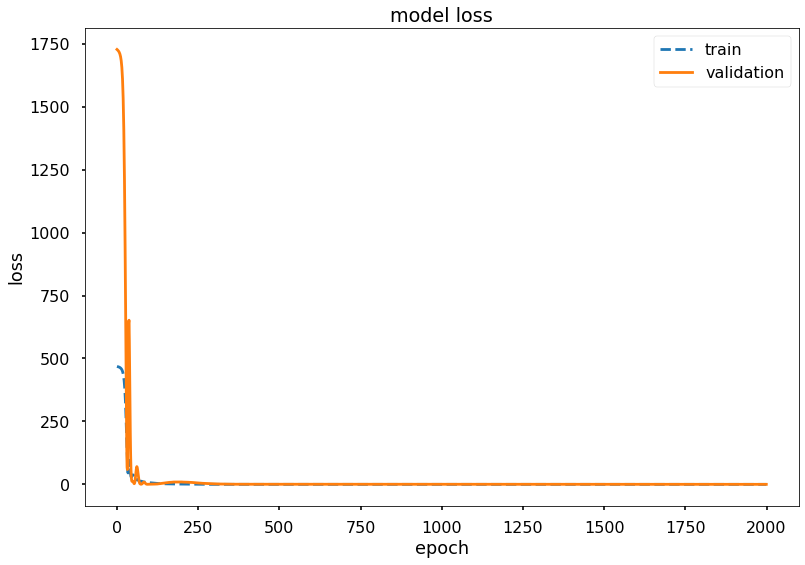

In [14]:
v.plot(history)

In [15]:
test_input = np.array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print("Input: ", test_input)
print("Actual: ", [11, 12])
print("Predicted: ", test_output)

Input:  [[[10]]]
Actual:  [11, 12]
Predicted:  [[10.990538 12.009166]]


___

## Solution via Bidirectional LSTM

In [16]:
model = Sequential()
inputs = Input(shape=(1, 1))
model.add(inputs)
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dense(2))

In [17]:
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100)               20800     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 21,002
Trainable params: 21,002
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE, verbose=0)

## Training Plot

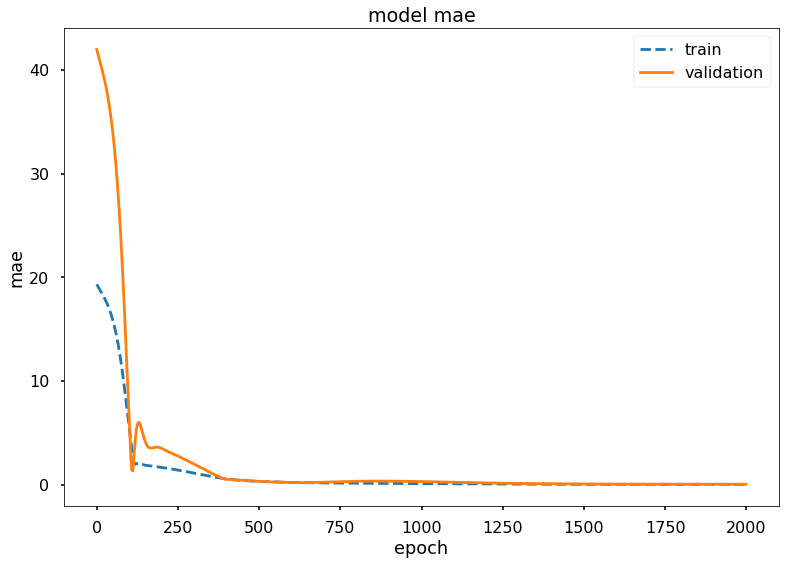

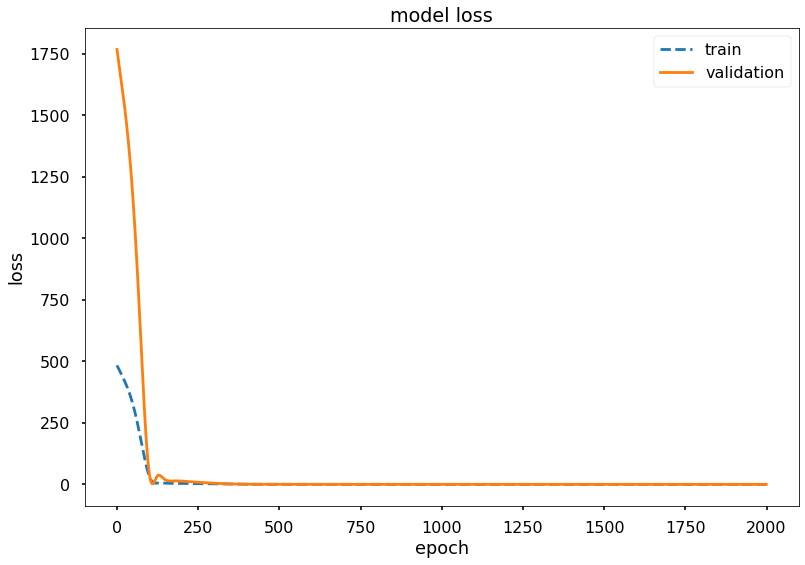

In [20]:
v.plot(history)

In [21]:
test_input = np.array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print("Input: ", test_input)
print("Actual: ", [11, 12])
print("Predicted: ", test_output)

Input:  [[[10]]]
Actual:  [11, 12]
Predicted:  [[10.95426  12.001407]]


___